In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pokemon = pd.read_csv("pokemon.csv")

In [3]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
pokemon.shape

(807, 14)

In [6]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
base_color = sns.color_palette()[0]

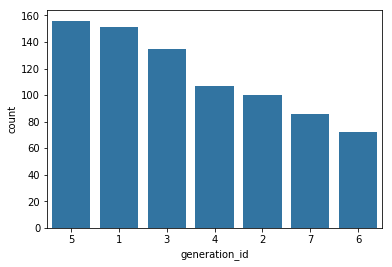

In [11]:
sns.countplot(data = pokemon, x = 'generation_id', color=base_color, order = pokemon.generation_id.value_counts().index);

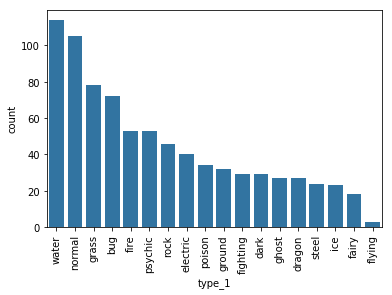

In [16]:
sns.countplot(data = pokemon, x = 'type_1', color=base_color, order = pokemon.type_1.value_counts().index)
plt.xticks(rotation = 90);

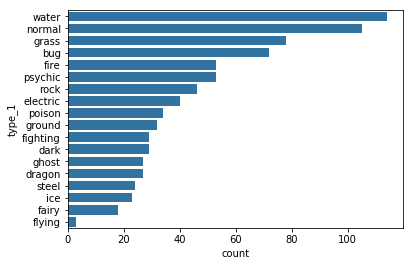

In [15]:
sns.countplot(data = pokemon, y = 'type_1', color=base_color, order = pokemon.type_1.value_counts().index)

### What proportion of pokemon with each type?

* Combine the type_1 and type_2

In [24]:
type_df = pd.melt(pokemon, id_vars=['id', 'species'], value_vars=['type_1', 'type_2'])

In [25]:
type_df.head()

,id,species,variable,value
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [27]:
type_df.rename(columns={'variable':'type_level', 'value':'type'}, inplace=True)

In [30]:
type_df.columns

Index(['id', 'species', 'type_level', 'type'], dtype='object')

In [31]:
type_count = type_df.type.value_counts()
order = type_count.index

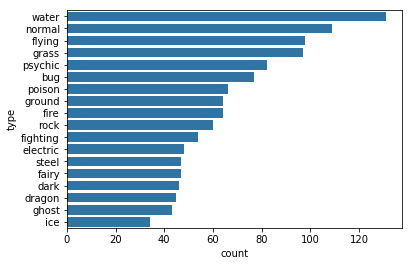

In [36]:
sns.countplot(data = type_df, y = 'type', color=base_color, order=order)

* Find what proportion of pokemon of each type, we can do it by just changing xticks from absolute count to relative count

In [37]:
n_pokemon = pokemon.shape[0]
max_type_count = type_count[0]
max_prop = max_type_count / n_pokemon

In [38]:
max_prop

0.1623296158612144

In [40]:
tick_props = np.arange(0, max_prop, 0.02)

In [41]:
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [42]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

In [43]:
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

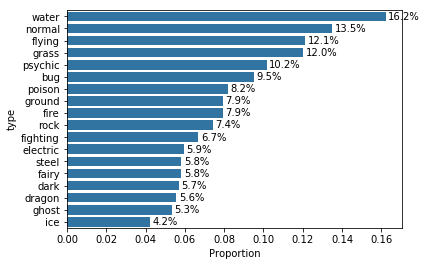

In [51]:
sns.countplot(data = type_df, y = 'type', color=base_color, order=order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel("Proportion");
for i in range(type_count.shape[0]):
    count = type_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count + 1, i, pct_string, va = 'center')

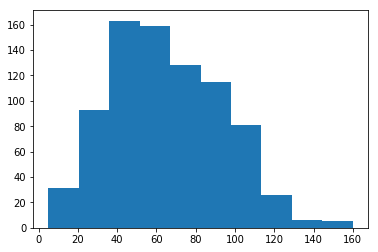

In [53]:
plt.hist(data=pokemon, x = 'speed');

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

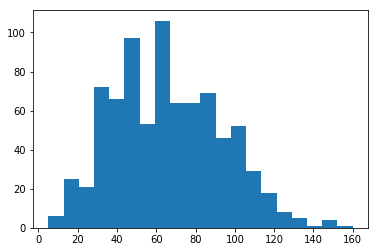

In [55]:
plt.hist(data=pokemon, x = 'speed', bins=20)

* Here bin values are not int and speed is int so some bin covers more int than others

In [57]:
bins = np.arange(0, pokemon.speed.max() + 5, 5)

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160], dtype=int64),
 <a list of 32 Patch objects>)

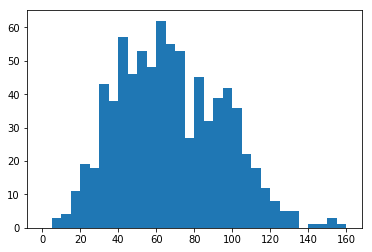

In [58]:
plt.hist(data=pokemon, x = 'speed', bins=bins)

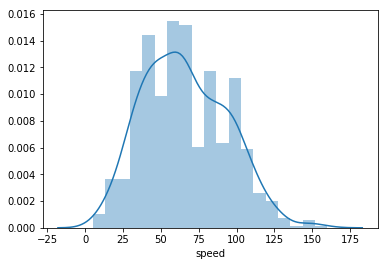

In [63]:
sns.distplot(pokemon.speed); #default bin count is larger

(array([109., 242., 225., 144.,  53.,  23.,   9.,   0.,   1.,   1.]),
 array([ 20.,  41.,  62.,  83., 104., 125., 146., 167., 188., 209., 230.]),
 <a list of 10 Patch objects>)

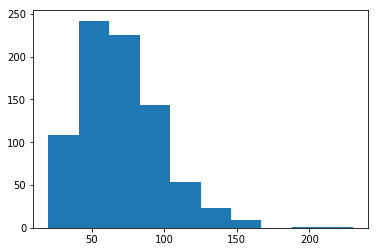

In [66]:
plt.hist(data=pokemon, x = 'special-defense')

In [70]:
bins = np.arange(pokemon['special-defense'].min(), pokemon['special-defense'].max() + 5, 5)

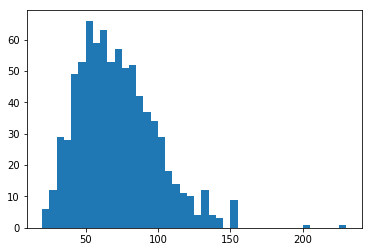

In [71]:
plt.hist(data=pokemon, x = 'special-defense', bins = bins);

In [74]:
bins = np.arange(0, pokemon.height.max() + 0.5, 0.5)

(array([139., 252., 206., 126.,  42.,  10.,   7.,   7.,   3.,   2.,   3.,
          3.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <a list of 29 Patch objects>)

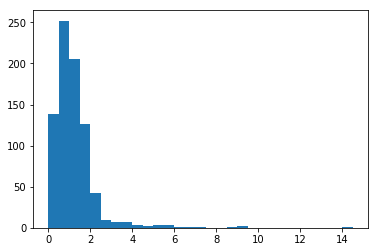

In [75]:
plt.hist(data=pokemon, x='height', bins=bins)

* Let's zoom in

(0, 6)

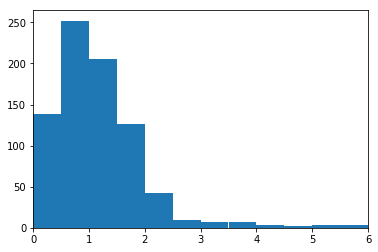

In [76]:
plt.hist(data=pokemon, x='height', bins=bins)
plt.xlim((0,6));

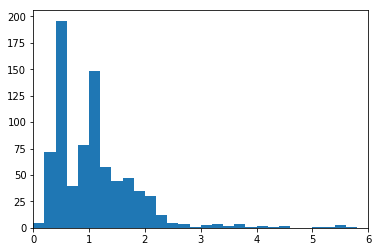

In [77]:
bins = np.arange(0, pokemon.height.max() + 0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins)
plt.xlim((0,6));

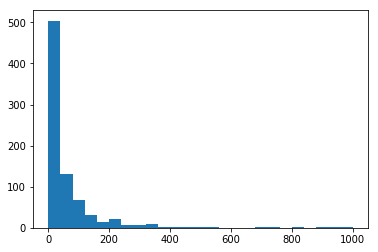

In [79]:
bins = np.arange(0, pokemon.weight.max() + 40, 40)
plt.hist(data=pokemon, x='weight', bins = bins);

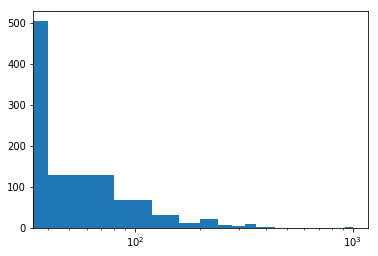

In [81]:
bins = np.arange(0, pokemon.weight.max() + 40, 40)
plt.hist(data=pokemon, x='weight', bins = bins);
plt.xscale('log')

In [82]:
np.log10(pokemon.weight).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

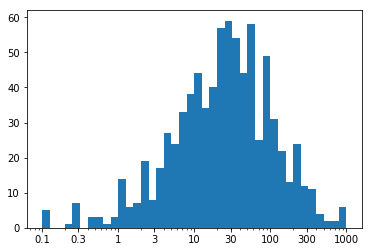

In [87]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins = bins)
ticks = [0.1,0.3,1,3,10,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels);
        

In [88]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']

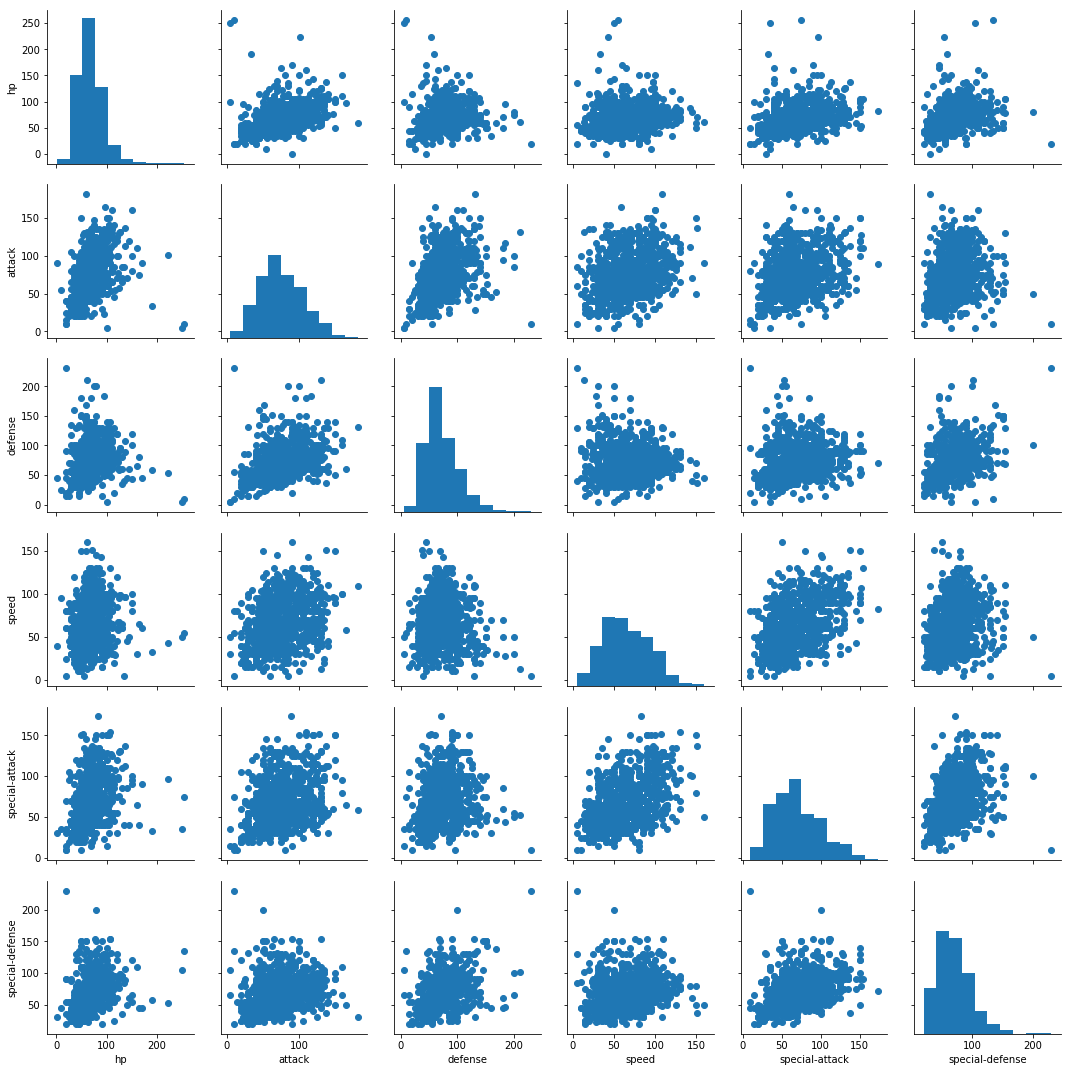

In [91]:
g = sns.PairGrid(data=pokemon, vars= pkmn_stats)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

In [92]:
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


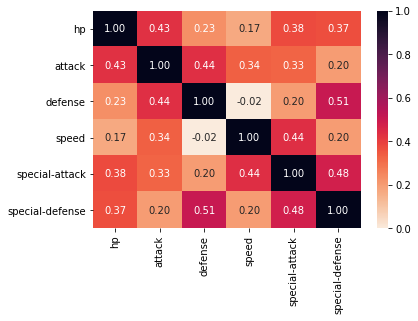

In [96]:
sns.heatmap(pokemon[pkmn_stats].corr(), cmap='rocket_r', annot=True, fmt='.2f', vmin=0)